In [229]:
url = "https://github.com/fivethirtyeight/data/blob/master/star-wars-survey/StarWars.csv"

In [230]:
import requests
responce = requests.get(url) 

In [231]:
responce

<Response [200]>

In [232]:
dir(responce)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [233]:
with open("StarWar.csv","w") as f:
    f.write(responce.text)

In [234]:
responce.json().keys()

dict_keys(['payload', 'title'])

In [235]:
data = responce.json()["payload"]["blob"]["rawLines"]

In [236]:
data[0]

'RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,,,,,,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,,,,,,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",,,,,,,,,,,,,,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Œæ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)'

In [237]:
import pandas as pd
with open("StarWar.csv","w") as f:
    f.writelines(data)

In [238]:
with open("star.csv","w") as f:
    for row in data:
        f.write(row+"\n")

In [239]:
star =  pd.read_csv("star.csv",encoding="windows-1251")

In [240]:
star

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Њж,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [241]:
df = star[1:].copy()

In [242]:
df.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [243]:
cleaned = df.iloc[:,0:3]

# loc does include last values
# iloc doesnot include last values


In [244]:
mapping = {"Yes":True,"No":False}

In [245]:
#cleaned['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping)

In [246]:
#cleaned.iloc[:,1] = cleaned['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping)

In [247]:
cleaned.iloc[:,1] = cleaned.iloc[:,1].map(mapping)

C:\Users\hp\AppData\Local\Temp\ipykernel_20608\2140238549.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cleaned.iloc[:,1] = cleaned.iloc[:,1].map(mapping)


In [248]:
cleaned.iloc[:,2] = cleaned.iloc[:,2].map(mapping)

In [249]:
cleaned

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False
4,3.292763e+09,True,True
5,3.292731e+09,True,True
...,...,...,...
1182,3.288389e+09,True,True
1183,3.288379e+09,True,True
1184,3.288375e+09,False,NaN
1185,3.288373e+09,True,True


In [250]:
renamed = ["id","seen_any","fan"]

In [251]:
rename_dict = dict(zip(cleaned.columns,renamed))

In [252]:
cleaned.rename(rename_dict, axis =1)#, inplace =True

,id,seen_any,fan
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False
4,3.292763e+09,True,True
5,3.292731e+09,True,True
...,...,...,...
1182,3.288389e+09,True,True
1183,3.288379e+09,True,True
1184,3.288375e+09,False,NaN
1185,3.288373e+09,True,True


In [253]:
cleaned

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False
4,3.292763e+09,True,True
5,3.292731e+09,True,True
...,...,...,...
1182,3.288389e+09,True,True
1183,3.288379e+09,True,True
1184,3.288375e+09,False,NaN
1185,3.288373e+09,True,True


In [254]:
cleaned.columns = renamed

In [255]:
cleaned

,id,seen_any,fan
1,3.292880e+09,True,True
2,3.292880e+09,False,NaN
3,3.292765e+09,True,False
4,3.292763e+09,True,True
5,3.292731e+09,True,True
...,...,...,...
1182,3.288389e+09,True,True
1183,3.288379e+09,True,True
1184,3.288375e+09,False,NaN
1185,3.288373e+09,True,True


In [256]:
df

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?Њж,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,3.288379e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,3.288375e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3.288373e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [257]:
cleaned.iloc[:,1:].value_counts()

seen_any  fan  
True      True     552
          False    284
dtype: int64

In [258]:
cleaned.iloc[:,1:].apply(pd.value_counts,axis= "index")

,seen_any,fan
True,936,552
False,250,284


In [259]:
df.iloc[:,3:9]

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
...,...,...,...,...,...,...
1182,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1183,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [260]:
seen = df.iloc[:,3:9].copy()

In [261]:
seen.columns = ["Seen_Eposode1","Seen_Eposode2",
               "Seen_Eposode3","Seen_Eposode4",
               "Seen_Eposode5","Seen_Eposode6"]

In [262]:
seen

,Seen_Eposode1,Seen_Eposode2,Seen_Eposode3,Seen_Eposode4,Seen_Eposode5,Seen_Eposode6
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
5,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
...,...,...,...,...,...,...
1182,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1183,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


In [263]:
seen = seen.notnull()

In [264]:
seen

,Seen_Eposode1,Seen_Eposode2,Seen_Eposode3,Seen_Eposode4,Seen_Eposode5,Seen_Eposode6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
...,...,...,...,...,...,...
1182,True,True,True,True,True,True
1183,True,True,True,True,True,True
1184,False,False,False,False,False,False
1185,True,True,True,True,True,True


In [265]:
ranking = df.iloc[:,9:15].copy()

In [266]:
ranking

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
...,...,...,...,...,...,...
1182,5,4,6,3,2,1
1183,4,5,6,2,3,1
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4,3,6,5,2,1


In [267]:
ranking.columns

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [268]:
ranking.columns =  ["ranking_"+str(i) for i in range(1,7)]

In [269]:
ranking

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
...,...,...,...,...,...,...
1182,5,4,6,3,2,1
1183,4,5,6,2,3,1
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4,3,6,5,2,1


In [270]:
ranking.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ranking_1  835 non-null    object
 1   ranking_2  836 non-null    object
 2   ranking_3  835 non-null    object
 3   ranking_4  836 non-null    object
 4   ranking_5  836 non-null    object
 5   ranking_6  836 non-null    object
dtypes: object(6)
memory usage: 55.7+ KB


# Float has null values int dont have NAN values

In [271]:
ranking.astype(float)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1182,5.0,4.0,6.0,3.0,2.0,1.0
1183,4.0,5.0,6.0,2.0,3.0,1.0
1184,NaN,NaN,NaN,NaN,NaN,NaN
1185,4.0,3.0,6.0,5.0,2.0,1.0


In [272]:
final = cleaned.merge(seen,left_index=True,right_index=True)
final = final.merge(ranking,left_index=True,right_index=True)

In [273]:
final

,id,seen_any,fan,Seen_Eposode1,Seen_Eposode2,Seen_Eposode3,Seen_Eposode4,Seen_Eposode5,Seen_Eposode6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,True,True,True,True,True,True,True,True,5,4,6,3,2,1
1183,3.288379e+09,True,True,True,True,True,True,True,True,4,5,6,2,3,1
1184,3.288375e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN
1185,3.288373e+09,True,True,True,True,True,True,True,True,4,3,6,5,2,1


In [274]:
#Data mining or wrangling

In [275]:
cleaned.iloc[:,1:].apply(lambda col:col.value_counts(normalize=True),axis= "index")

,seen_any,fan
True,0.789207,0.660287
False,0.210793,0.339713


In [276]:
cleaned.iloc[:,1:]["seen_any"].value_counts(normalize=True)*100

True     78.920742
False    21.079258
Name: seen_any, dtype: float64

In [277]:
def perc(col):
    return col.value_counts(normalize =True)    

In [278]:
final.iloc[:,1:3].apply(perc,axis = 0)

,seen_any,fan
True,0.789207,0.660287
False,0.210793,0.339713


In [279]:
final.iloc[:,:9]

,id,seen_any,fan,Seen_Eposode1,Seen_Eposode2,Seen_Eposode3,Seen_Eposode4,Seen_Eposode5,Seen_Eposode6
1,3.292880e+09,True,True,True,True,True,True,True,True
2,3.292880e+09,False,NaN,False,False,False,False,False,False
3,3.292765e+09,True,False,True,True,True,False,False,False
4,3.292763e+09,True,True,True,True,True,True,True,True
5,3.292731e+09,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
1182,3.288389e+09,True,True,True,True,True,True,True,True
1183,3.288379e+09,True,True,True,True,True,True,True,True
1184,3.288375e+09,False,NaN,False,False,False,False,False,False
1185,3.288373e+09,True,True,True,True,True,True,True,True


In [280]:
percentage = final.iloc[:,1:9].apply(lambda col:col.value_counts(normalize=True),axis= "index")

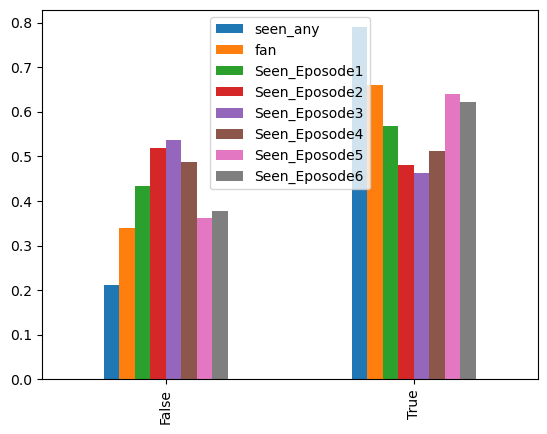

In [281]:
import matplotlib.pyplot as plt

percentage.plot.bar()
plt.show()

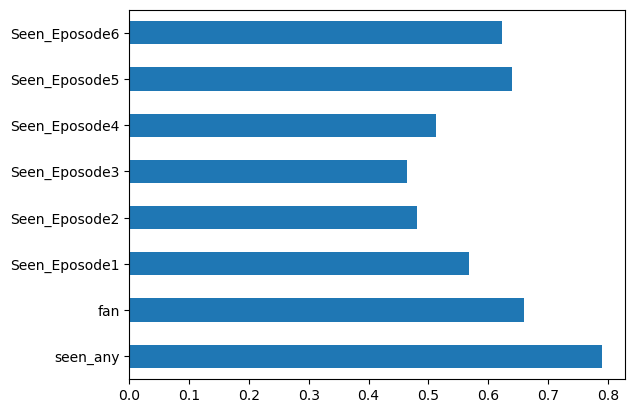

In [282]:
percentage.loc[True].plot.barh()
plt.show()

In [287]:
final.iloc[:,9:] = final.iloc[:,9:].astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_20608\691977732.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  final.iloc[:,9:] = final.iloc[:,9:].astype(float)


In [288]:
final.iloc[:,9:].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

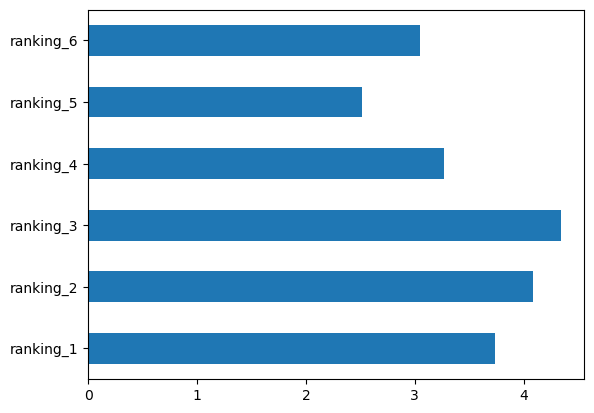

In [289]:
final.iloc[:,9:].mean().plot.barh()
plt.show()

In [290]:
male_bol = df["Gender"] =="Male"
female_bol = df["Gender"] =="Female"
male = final[male_bol]
female = final[female_bol]
male.shape ,female.shape

((497, 15), (549, 15))

In [291]:
print(male.shape[0]+female.shape[0])

1046


In [292]:
df["Gender"].value_counts(dropna =False)

Female    549
Male      497
NaN       140
Name: Gender, dtype: int64

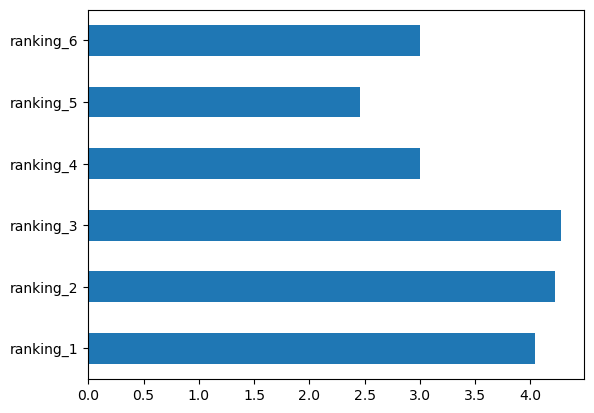

In [293]:
male.iloc[:,9:].mean().plot.barh()
plt.show()

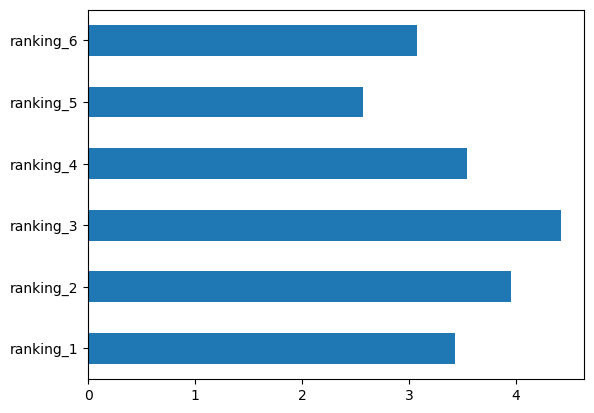

In [294]:
female.iloc[:,9:].mean().plot.barh()
plt.show()